# Исследование данных о компьютерных играх. <br>  Определение популярных компютерных игр для планирования рекламной кампании на следующий календарный год.

В нашем распоряжении данные из открытых источников о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеем данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**

1. Выявить критерии, по которым возможно определить успешность компьютерной игры. <br>
2. Проверить степень влияния критериев на успешность игры.  <br>
3. Определить наиболее популярные компьютерные игры для различных критериев, сегментов. <br>

**Ход исследования (этапы):**

- Получить данные из файла. <br>
- Обзор данных. <br>
- Предобработка данных.  <br>
- Исследовательский анализ: <br>
  выпуск игр по годам; <br>
  продажи игр по платформам; <br>
  выбор временного периода для анализа данных; <br>
  влияние отзывов на рейтинг игр; <br>
  выявление жанров игр; <br>
  составление портрета пользователя игр для каждого региона. <br>
- Проверка сформулированных гипотез. <br>
- Общий вывод. 

**В датасете содержатся следующие данные (по столбцам):** <br>
•	`Name` — название игры <br>
•	`Platform` — платформа <br>
•	`Year_of_Release` — год выпуска <br>
•	`Genre` — жанр игры <br>
•	`NA_sales` — продажи в Северной Америке (миллионы проданных копий) <br>
•	`EU_sales` — продажи в Европе (миллионы проданных копий) <br>
•	`JP_sales` — продажи в Японии (миллионы проданных копий) <br>
•	`Other_sales` — продажи в других странах (миллионы проданных копий) <br>
•	`Critic_Score` — оценка критиков (максимум 100) <br>
•	`User_Score` — оценка пользователей (максимум 10) <br>
•	`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открыть файл с данными и изучить общую информацию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('C:/Users/dataset.csv')
except:
    df = pd.read_csv('/dataset.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Получили датафрейм из 16715 строк. Явно много пропусков в столбцах Critic_Score, User_Score, Rating. Нужно посмотреть на эти пропуски, возможно ли их заполнить. Вопрос к типу данных у столбцов: Year_of_Release, User_Score, скорее всего его необходимо изменить.

## Подготовка данных.

### Замена названия столбцов (приведем к нижнему регистру).

In [5]:
df.columns = df.columns.str.lower()

### Преобразование данных в нужные типы.

Столбец user_score (оценка пользователей, максимум 10) имеет тип object (строка). Это явно не правильно, его нужно заменить либо на тип int, либо на тип float. В столбце также есть пропуски. Посмотрим уникальные данные в этом столбце.

In [6]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В основном тут вещественные значения, значит тип должен быть float. Непонятное значение 'tbd'. Кроме пропусков, с ним также необходимо разобраться, чтобы изменить тип столбца user_score. Выполним это чуть позже.

Столбец year_of_release (год выпуска игры) имеет вещественный тип. Его явно нужно изменить на int. В столбце также есть пропуски. Посмотрим на уникальные данные в этом столбце.

In [7]:
df['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Имеем данные с 1980 года по 2016 год. Также необходимо разобраться с пропусками, чтобы изменить тип столбца.

**В итоге необходимо у столбца user_score изменить тип на float, у столбца year_of_release изменить тип на int.**

### Обработка пропусков, дубликатов.

Определим, в каких столбцах есть пропуски, посчитаем их кол-во.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Выявили 6 столбцов с пропусками. Выведим их уникальные значения для анализа внесенных данных и для определения возможности исправить эти пропуски, либо удалить.

Столбец name - название игры.

In [9]:
df['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [10]:
# получим срез с пропусками
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Столбец name - содержит название игры. Самостоятельно его заполнить мы не можем. Таких строк всего 2, поэтому можем их удалить без ущерба для дальнейшей работы. Кстати тут также 2 пропуска в столбце genre - жанр игры. Получается что их удаляем тоже.

In [11]:
df = df.dropna(subset=['name'])

Для удобства в name приведем все к нижнему регистру, уберем пробелы в начале и конце названий игр.

In [12]:
df['name'] = df['name'].str.lower()

In [13]:
df['name'] = df['name'].str.strip()

Столбце genre - жанр игры. Посмотрим на данные в этом столбце.

In [14]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Уникальных значений в столбце genre не много, в общем они "читабельные", можем просто привести их к нижнему регистру.

In [15]:
df['genre'] = df['genre'].str.lower()

Пропуски в year_of_release - сделаем срез.

In [16]:
df.loc[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Данные пропуски самостоятельно заполнить не можем, нет логичной замены. Их кол-во в рамках всего датафрейма не большое, можем удалить. И после этого можем изменить тип столбца на необходимый (int).

In [17]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)

Пропуски в столбце critic_score - оценка критиков (максимум 100). Смотрим на уникальные значения.

In [18]:
df['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Значения без видимых ошибок. Но пропусков достаточно много, удалить не можем, т.к. это может повлиять на дальнейший анализ. Заполнить их каким-то логичным значением также не получается, т.к. оценка может зависеть сразу от нескольких параметров. Например - год выпуска игры (а у нас период в 36 лет), жанра, платформы.

Пропуски в столбце user_score - оценка пользователей (максимум 10). Тут тоже пропусков достаточно много. По аналогии с данными в столбце critic_score - удалить не можем, логичной замены нет, оставляем без изменения. Также здесь внесено значение 'tbd'. Для компьютерных игр видимо оно означает - "To Be Determined", т.е. "Будет определено". Вероятно игру еще не оценили по каким-то причинам. Логичнее заменить это значение на пропуск NaN.

In [19]:
# функция для замены значения 'tbd' на NaN
def replace_wrong_values(wrong_values, correct_values):
    df['user_score'] = df['user_score'].replace(wrong_values, correct_values)

replace_wrong_values('tbd', np.NaN)
# проверка уникальных значений в столбце после применения функции
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [20]:
# теперь изменим тип данного столбца на верный
df['user_score'] = df['user_score'].astype(float)

Столбец rating - рейтинг от организации ESRB. Посмотрим на значения.

In [21]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В столбце rating также достаточно много пропусков. И также нет логичной замены, но можем внести значение "не указан".

In [22]:
# функция для замены пропусков в столбце 'rating' на значение 'не указан'
def replace_wrong_rating(wrong_rating, correct_rating):
    df['rating'] = df['rating'].replace(wrong_rating, correct_rating)

replace_wrong_rating(np.NaN, 'не указан')

In [23]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'не указан'],
      dtype=object)

In [24]:
# можно раскомментировать коды и еще раз проверить данные - кол-во пропусков и типы
# df.isna().sum()
# df.info()

In [25]:
# проверка на явные дубликаты
df.duplicated().sum()

0

**Вывод:** <br>
Пропуски в столбцах name и genre удалили, их было всего по 2 в каждом столбце. Могли возникуть, т.к. например не было присвоено название/жанр для игры. Либо сыграл человеческий фактор - забыли указать значение. <br>
Пропуски в столбцах critic_score и user_score: оставили без заполнения, т.к. нет логичной замены. Пропуски могли возникнуть по ряду причин: игра новая и еще у нее нет оценок, либо игра просто не оценивалась. <br>
Пропуски в столбце rating заменили на значение 'не указан', значит рейтинг не известен, не был определен. Также может быть не заполнен, т.к. например игра еще не получила категорию от организации ESRB. <br>
Пропуски в столбце year_of_release - удалили, т.к. их было не много. Могли возникнуть из-за ряда причин: забыли указать данные, либо год выпуска игры не определен.

### Подсчет суммарных продаж во всех регионах.

In [26]:
# запишем в отдельный столбец суммарные продажи во всех регионах
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,не указан,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,не указан,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,не указан,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,не указан,28.31


## Исследовательский анализ данных.

### Cколько игр выпускалось в разные годы.

Проверим, сколько игр выпускалось в разные годы. Посмотрим, важны ли данные за все периоды.

In [27]:
# сгруппируем данные по году выпуска, для каждого года посчитаем кол-во игр по столбцу name
group_year_name = df.groupby('year_of_release')['name'].count()
group_year_name

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

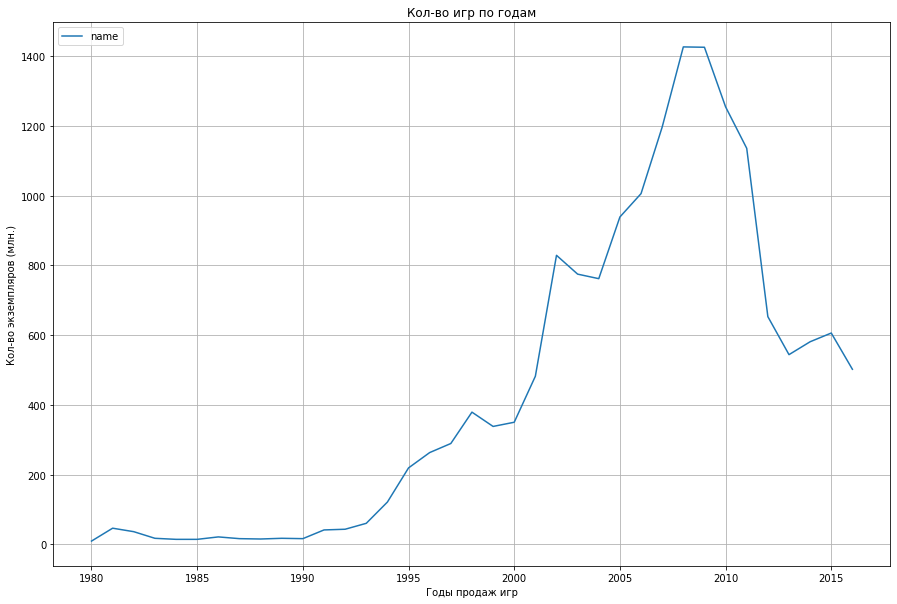

In [28]:
group_year_name.plot(grid=True, figsize=(15,10), title='Кол-во игр по годам').legend(loc='upper left')

# меняем название горизонтальной оси ('X')
plt.xlabel('Годы продаж игр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Кол-во экземпляров (млн.)')
plt.show()

**Вывод:** судя по данной выгрузке период до 1994 года можно не брать. Период 2006-2011 г.г. тут самое максимальное кол-во игр, рост до 2009 г., далее их кол-во пошло на спад.

### Как менялись продажи по платформам. Характерный срок появления и упадка платформы.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.

In [29]:
# построим таблицу: суммарные продажи для каждой платформы
group_platform_tsales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
.sort_values('total_sales', ascending=False).reset_index()
group_platform_tsales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


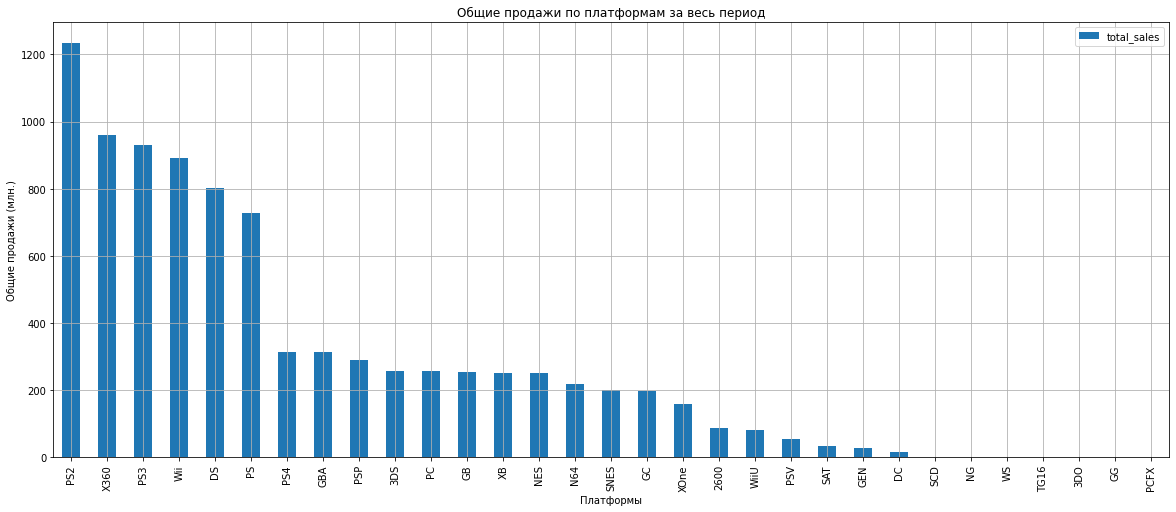

In [30]:
group_platform_tsales.plot(x='platform', y='total_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Общие продажи по платформам за весь период')
# меняем название горизонтальной оси ('X')
plt.xlabel('Платформы')
# меняем название вертикальной оси ('Y')
plt.ylabel('Общие продажи (млн.)')
plt.show()

Это была группировка по платформам с подсчетом общего кол-ва продаж для каждой платформы. Но нужна еще и разбивка по годам, чтобы понимать динамику.

Выделим топ-8 платформ с наибольшим кол-во продаж.

In [31]:
list_pl_8 = group_platform_tsales.loc[0:7,'platform'].to_list()
list_pl_8

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

Для топ-8 платформ посмотрим динамику продаж по годам. Возьмем годы с 2006 когда начинался рост в кол-ве игр.

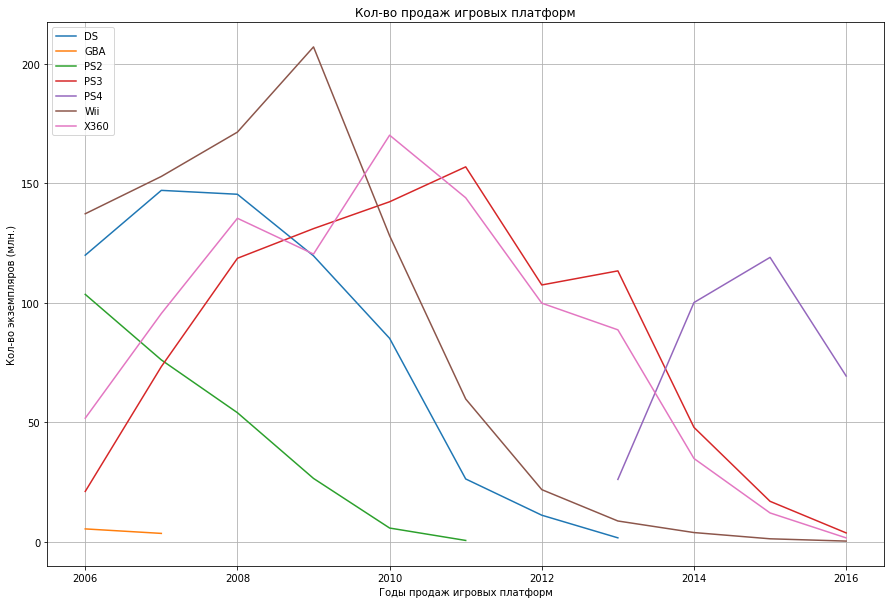

In [32]:
df.query('platform in @list_pl_8 and year_of_release >= 2006') \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(grid=True, figsize=(15,10), title='Кол-во продаж игровых платформ').legend(loc='upper left')

# меняем название горизонтальной оси ('X')
plt.xlabel('Годы продаж игровых платформ')
# меняем название вертикальной оси ('Y')
plt.ylabel('Кол-во экземпляров (млн.)')
plt.show()

**Вывод:** судя по графику характерный срок появления новой платформы 1-2 года. Далее продажи идут на спад. Исчезновение старых платформ происходит постепенно, может происходить от 1 года до 4-6 лет.

In [33]:
# построим сводную таблицу: берем платформы из топ-8 и определяем для них год старта продаж (min)
# и год завершения продаж (max)
df_1 = df.query('platform in @list_pl_8 and year_of_release >= 2006')\
.pivot_table(index='platform', values='year_of_release', aggfunc=['max','min']).reset_index()
df_1.columns = ['platform', 'max_year', 'min_year']
# определим время существования платформы (max - min) и найдем среднее значение
df_1['platf_time'] = df_1['max_year'] - df_1['min_year']
df_1['platf_time'].mean()

6.571428571428571

**Вывод:** Средний период жизни платформы - 6,5 лет. Также можно на графике определить даты начала и завершения продаж, и разница между ними - как раз период существования платформы.

### Определение актуального периода для дальнейшего анализа.

Ранее отсекли период до 1994 г., там малое кол-во продаж, он не информативен. Основной рост в кол-ве игр был с 2006 г. За этот период посмотрели динамику продаж для топ-8 платформ. Для некоторых платформ можем наблюдать практически полный цикл: от старта до спада продаж.

**Вывод:** Определим актуальный период для прогноза на 2017 г. как период 2014-2016 гг. За это время можно отследить какие платформы идут на спад, какие появились не так давно. Сюда войдет платформы из топ-8 платформ по продажам. На основании этого можно выявить разные закономерности.

### Определение платформ, которые лидируют по продажам, растут или падают. Выбор несколько потенциально прибыльных платформ.

Для визуализации снова построим график продаж по платформам в динамике по годам из актуального периода.

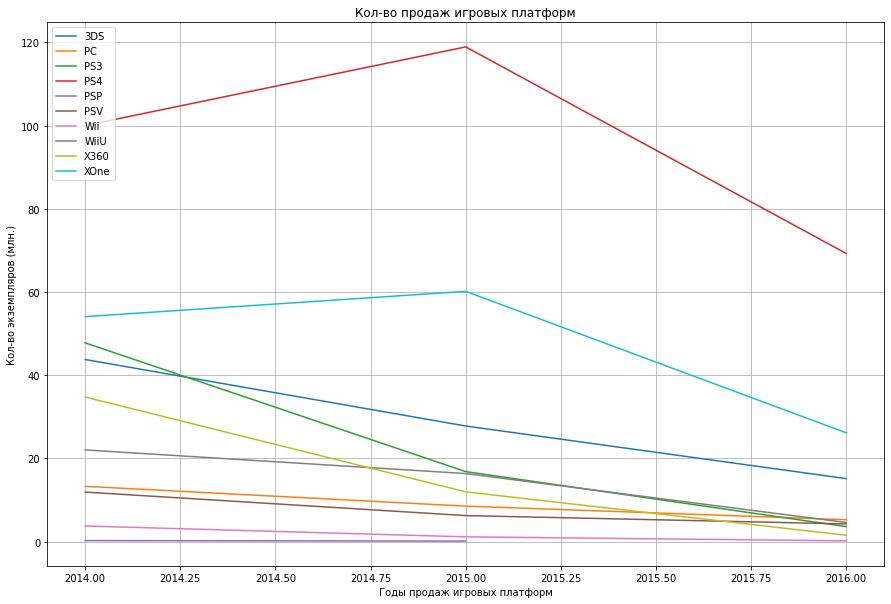

In [34]:
df.query('year_of_release >= 2014') \
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
.plot(grid=True, figsize=(15,10), title='Кол-во продаж игровых платформ').legend(loc='upper left')

# меняем название горизонтальной оси ('X')
plt.xlabel('Годы продаж игровых платформ')
# меняем название вертикальной оси ('Y')
plt.ylabel('Кол-во экземпляров (млн.)')
plt.show()

**Вывод:** исходя из графика достаточно интересны платформы X360, 3DS, PS3 - продажи в итоге пошли на спад, который занял продолжительное время, но были достаточно длительные периоды роста. <br>
Невысокие продажи (почти весь период существования платформы) были у платформ PC, PSV. <br>
В качестве потенциально прибыльных платформ будем рассматривать PS4, XOne, т.к. их старт начался отностельно недавно, сейчас их продажи самые восокие, выше остальных от нуля.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

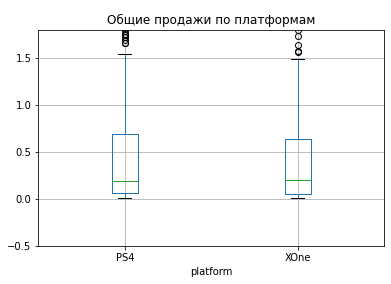

In [35]:
df_good_platf = df.query("platform == ['PS4','XOne'] and year_of_release >=2014")
df_good_platf.boxplot(column='total_sales', by='platform').set_title("Общие продажи по платформам")
plt.suptitle(' ') # удаляем заголовок boxplot по умолчанию
plt.ylim(-0.5, 1.8)
plt.show()

In [36]:
df_good_platf.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


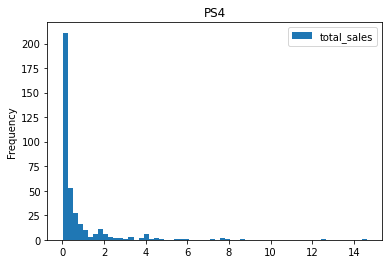

In [37]:
df_good_platf[df_good_platf['platform']=='PS4'].plot(y='total_sales', title='PS4', kind='hist', bins=60)
plt.show()

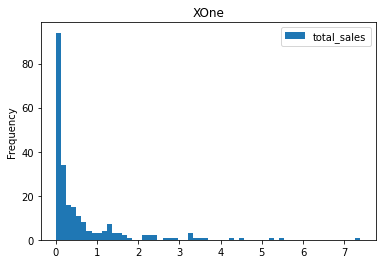

In [38]:
df_good_platf[df_good_platf['platform']=='XOne'].plot(y='total_sales', title='XOne', kind='hist', bins=60)
plt.show()

Для платформ PS4, XOne вывели основные характеристики. На графике "ящик с усами" (поменяли масштаб) также видно, что медиана и квантиль Q3 практически одинаковые. 

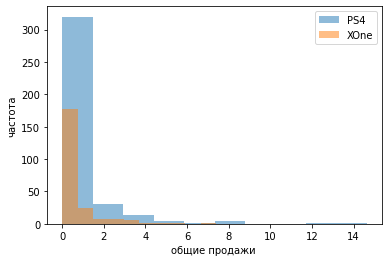

In [39]:
df_good_platf.groupby('platform')['total_sales'].plot(kind='hist', bins=10, alpha=0.5)
plt.legend(['PS4', 'XOne'])
plt.xlabel('общие продажи ')
plt.ylabel('частота')
plt.show()

Посмотрели характеристики и распределение доходов от игр платформ PS4, XOne. Показатель медианы можем расшифровать как - насколько «в среднем» платформа прибыльна. Получается, что у XOne в среднем около 205 тыс. продаж игр (их жанров), а у PS4 - 185 тыс.

Для сравнения исследуем достаточно интересные платформы X360, 3DS, PS3.

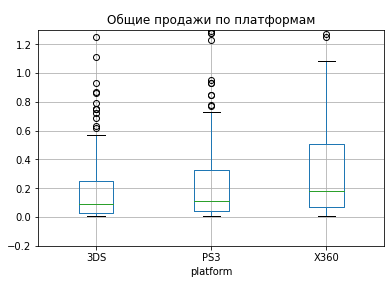

In [40]:
df_int_platf = df.query("platform == ['X360', '3DS', 'PS3'] and year_of_release >=2014")
df_int_platf.boxplot(column='total_sales', by='platform').set_title("Общие продажи по платформам")
plt.suptitle(' ') # удаляем заголовок boxplot по умолчанию
plt.ylim(-0.2, 1.3)
plt.show()

In [41]:
df_int_platf.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.03,0.09,0.250,11.68
PS3,219.0,0.311324,0.633059,0.01,0.04,0.11,0.325,5.27
X360,111.0,0.434414,0.628967,0.01,0.07,0.18,0.505,4.28


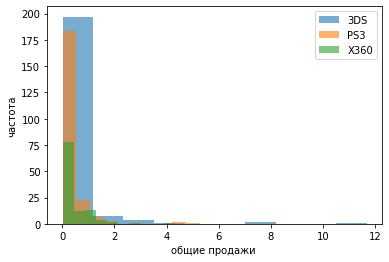

In [42]:
df_int_platf.groupby('platform')['total_sales'].plot(kind='hist', bins=10, alpha=0.6)
plt.legend(['3DS', 'PS3', 'X360'])
plt.xlabel('общие продажи ')
plt.ylabel('частота')
plt.show()

**Вывод:** построили диаграмму размаха для платформ PS4, XOne. Для обоих платформ есть выбросы, для PS4 их больше. Есть точечные выбросы. Может быть вышли какие-то новые игры, обновления, и начался резкий скачок продаж. Показатель медианы можем расшифровать как - насколько «в среднем» платформа прибыльна. Получается, что у XOne в среднем около 205 тыс. продаж игр (их жанров), а у PS4 - 185 тыс. <br>
Также исследовали достаточно интересные платформы X360, 3DS, PS3. Здесь наиболее прибыльной оказалась платформа X360, в среднем 180 тыс. проданных жанров игр.

### Влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Возьмем для рассмотрения платформу PS4, т.к. у нее продажи выше.

In [43]:
df_good_platf[df_good_platf['platform']=='PS4']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,не указан,14.63
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,не указан,7.98
92,call of duty: advanced warfare,PS4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,root letter,PS4,2016,adventure,0.00,0.00,0.01,0.00,69.0,7.5,не указан,0.01
16503,shin hayarigami 2,PS4,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,не указан,0.01
16526,dungeons 2,PS4,2016,role-playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,carmageddon: max damage,PS4,2016,action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


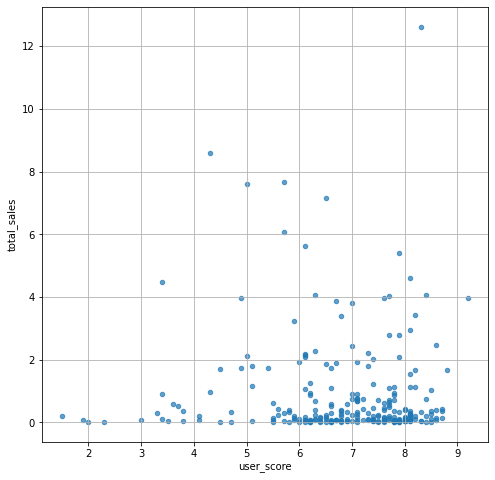

In [44]:
# построим диаграмму рассеяния по платформе PS4, отобразив отзывы пользователей
df_good_platf[df_good_platf['platform']=='PS4'].plot(x='user_score', \
                                            y='total_sales', kind='scatter', alpha=0.7, figsize=(8,8), grid=True)
plt.show()

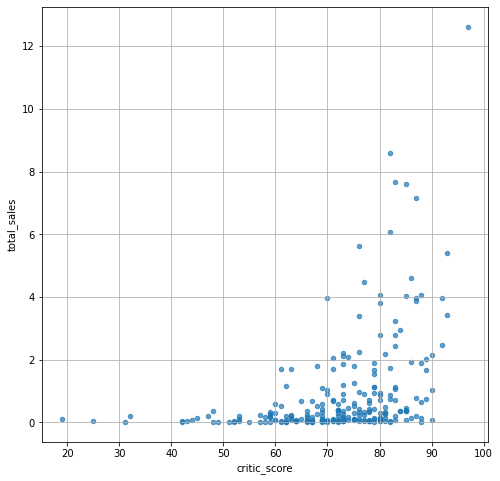

In [45]:
# построим диаграмму рассеяния по платформе PS4, отобразив отзывы критиков
df_good_platf[df_good_platf['platform']=='PS4'].plot(x='critic_score', \
                                            y='total_sales', kind='scatter', alpha=0.7, figsize=(8,8), grid=True)
plt.show()

Посчитаем коэф-т корреляции Пирсона для двух величин, чтобы оценить численно насколько тесная взаимосвязь между ними.

In [46]:
df_ps4 = df_good_platf[df_good_platf['platform']=='PS4']
df_ps4['user_score'].corr(df_ps4['total_sales']) # корреляция между оценками пользователеей и общими продажами

-0.040131589472697356

In [47]:
df_ps4['critic_score'].corr(df_ps4['total_sales']) # корреляция между оценками критиков и общими продажами

0.40266141068104083

**Вывод:** построили диаграмму рассеяния по платформе PS4, отобразив отзывы пользователей и критиков. В основном оценки для платформы PS4 достаточно высокие. Зависимости между оценками пользователей и общими продажами тут нет. Также зависимость между оценками критиков и общими продажами слабо выраженная, положительная.

### Соотнесение выводов с продажами игр на других платформах.

Построим диаграмму рассеяния по другим платформам, отобразив общие продажи

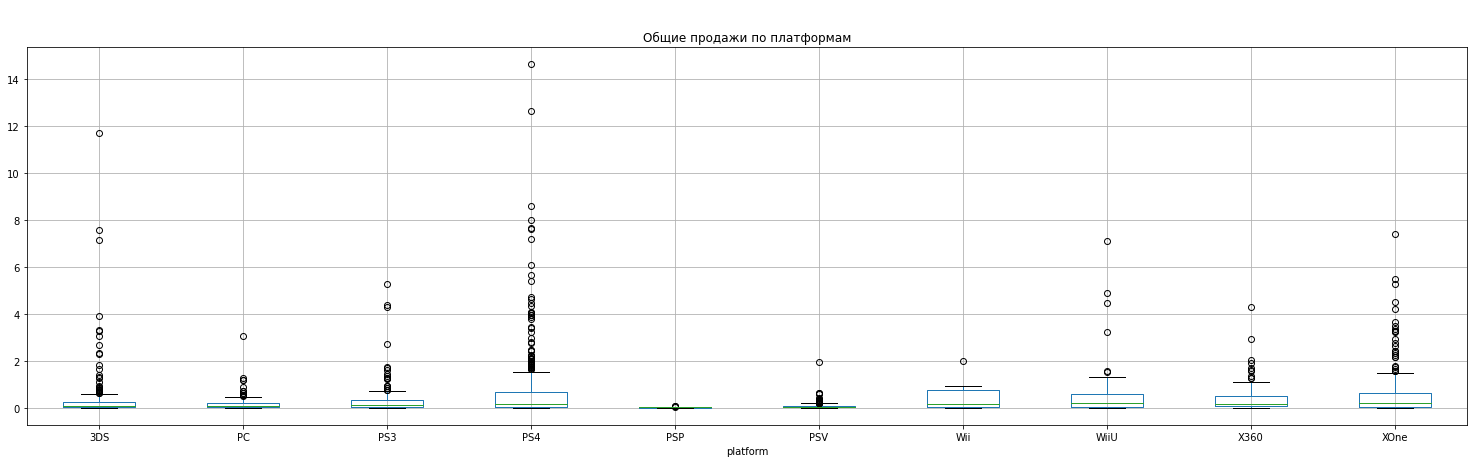

In [48]:
df.query('year_of_release >= 2014') \
.boxplot(column='total_sales', by='platform', figsize=(25,7)).set_title("Общие продажи по платформам")
plt.suptitle(' ') # удаляем заголовок boxplot по умолчанию
plt.show()

По оси Y отрегулируем диапазон, чтобы посмотреть где есть частые выбросы, а где остаются редкие. 

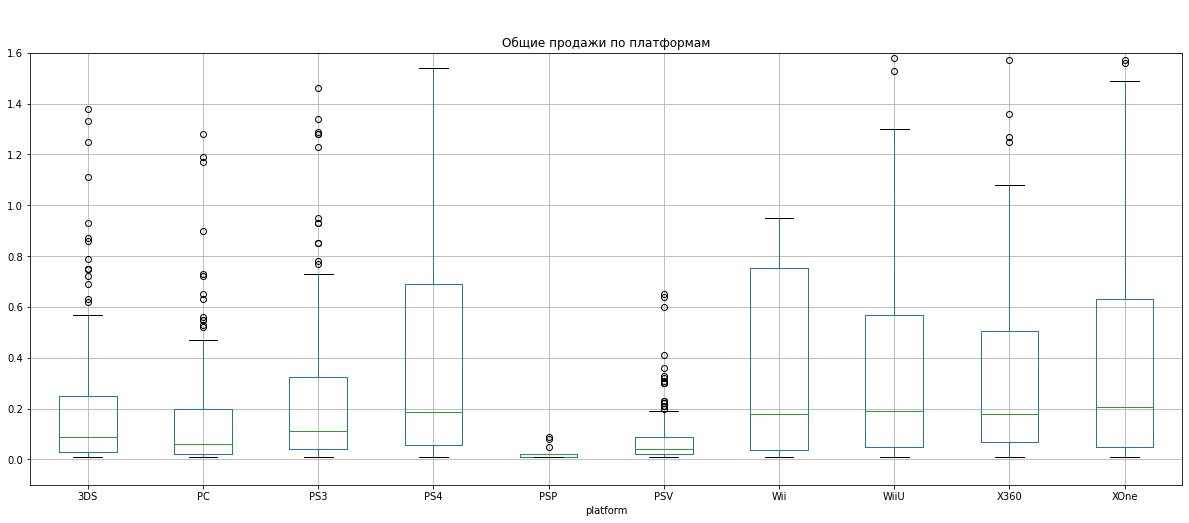

In [49]:
df.query('year_of_release >= 2014') \
.boxplot(column='total_sales', by='platform', figsize=(20,8)).set_title("Общие продажи по платформам")
plt.suptitle(' ') # удаляем заголовок boxplot по умолчанию
plt.ylim(-0.1, 1.6)
plt.show()

**Вывод**: судя по диаграмме, платформы с высокими продажами: PS4, WiiU, Wii, XOne. У них высокие границы размаха - динный "ус" от Q3. Приблизительно на одном уровне находятся медианы у PS4, Wii, WiiU, XOne. Т.е. в среднем у них продажи в районе 190 тыс. игр. Медианы также выше чем у других платформ, и большая часть значений (продаж) лежит около 0.5 млн. Выбросы - возможно игры продавалась быстрее, например из-за актуальных доработок, обновлений и пр. 

### Оценка общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим диаграмму рассеяния игр по жанрам, отобразив общие продажи

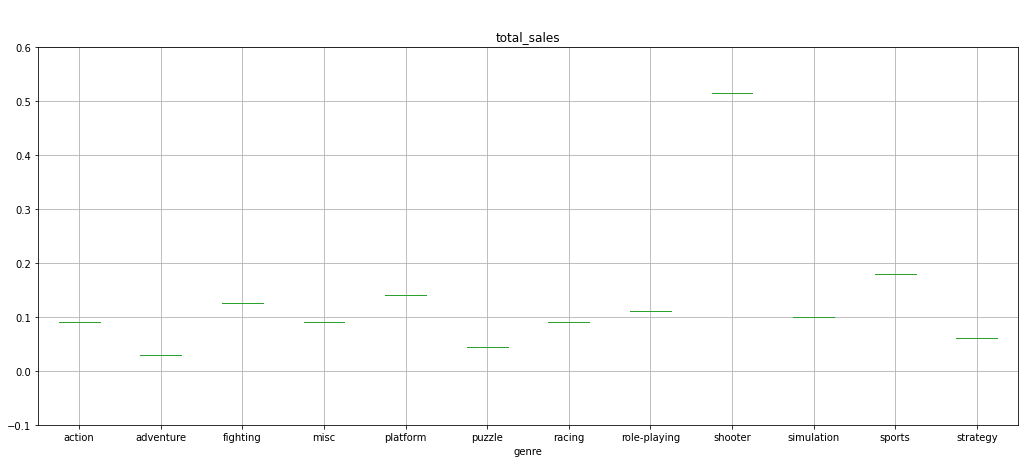

In [50]:
df.query('year_of_release >= 2014') \
.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.boxplot(column='total_sales', by='genre', figsize=(17,7))
plt.suptitle(' ') # удаляем заголовок boxplot по умолчанию
plt.ylim(-0.1, 0.6)
plt.show()

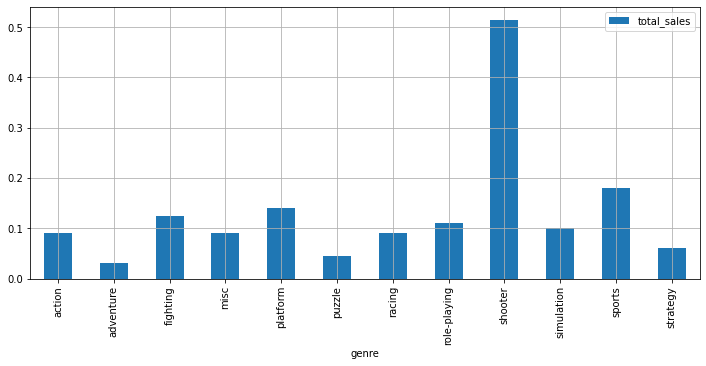

In [51]:
df.query('year_of_release >= 2014') \
.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.plot(y='total_sales', kind='bar', grid=True, figsize=(12, 5))
plt.show()

Судя по диаграмме получаем топ-5 самых популярных жанров:<br>
shooter <br>
sports <br>
platform <br>
fighting <br>
action

И топ-5 самых непопулярных жанров: <br>
adventure <br>
puzzle <br>
strategy <br>
simulation <br>
misc <br>

**Общий вывод:** <br>
Начали анализ с определения - сколько игр выпускалось ежегодно. Определили, что период до 1994 года не информативен, было очень мало игр. Начиная с 2006 г. по 2011 был рост, а далее постепенный спад в выпуске игр.<br>
Далее провели анализ продаж по платформам, сделали распределение по годам. Для нескольких платформ с максимальными продажами посмотрели динамику продаж. В результате этого определили, что в среднем характерный срок появления новой платформы 1-2 года. Далее продажи идут на спад. Исчезновение старых платформ происходит постепенно, может происходить от 1 года до 4-6 лет. Средний период жизни платформы 6,5 лет. <br>
Определили актуальный период для прогноза на 2017 г. как период 2014-2016 гг. За это время можно отследить какие платформы идут на спад, какие появились не так давно. Сюда войдет платформы из топ-8 платформ по продажам. На основании этого можно выявить разные закономерности.<br>
Выбрали потенциально прибыльные платформы. Ими оказались PS4, XOne.<br>
После построения графиков распределения для лидирующих платформ выявили выбросы. Но их мы оставляем, т.к. они могут потребоваться для дальнейшего анализа.<br>
Посмотрели, как влияют на продажи в рамках платформы PS4 отзывы. В основном оценки достаточно высокие. Но зависимость между оценками пользователей и общими продажами не выявлена. Также зависимость между оценками критиков и общими продажами слабо выражена, но положительная.<br>
Также исследовали распределение игр по жанрам. Выделили топ-5 популярных жанров и топ-5 жанров с низкими продажами.<br>

## Составление портрета пользователя каждого региона.

### Определение для пользователя каждого региона (NA, EU, JP) самых популярных платформ (топ-5).

#### Топ-5 самых популярных платформ в Сев.Америке

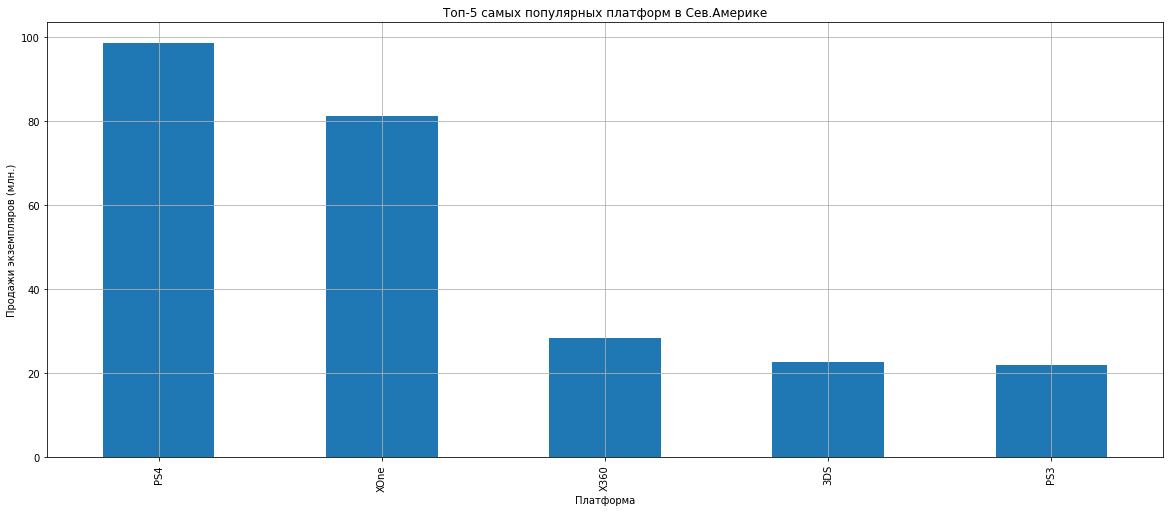

In [52]:
df_new = df.query('year_of_release >= 2014') # создадим новый датафрейм с данными за актуальный период

# группируем продажи в Сев.Америке по платформам
platform_na = df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_na.plot(x='platform', y='na_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных платформ в Сев.Америке')
# меняем название горизонтальной оси ('X')
plt.xlabel('Платформа')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [53]:
# найдем долю продаж в Сев.Америке

# переменной platform_total присвоим сумму общих продаж по всем платформам
platform_total = df_new.groupby('platform')['total_sales'].sum()

# вычисляем долю (процентное соотношение)
percent_na = platform_na / platform_total * 100
print('Доля продаж в Сев.Америке:')
print(percent_na.sort_values(ascending=False).head(5))

Доля продаж в Сев.Америке:
platform
X360    58.689341
XOne    57.901111
PS4     34.221760
PS3     32.340862
3DS     26.119059
dtype: float64


По гистограмме видно, что платформа PS4 лидер по продажам в Сев.Америке, но при этом доля относительно общих продаж у платформы занимает 3-е место. На это могут влиять предпочтения пользователей в отдельно взятом регионе и в остальных регионах вместе взятых. Может быть в анализируемый период времени в др. регионах проходили различные активности для стимулирования продаж.

#### Топ-5 самых популярных платформ в Европе

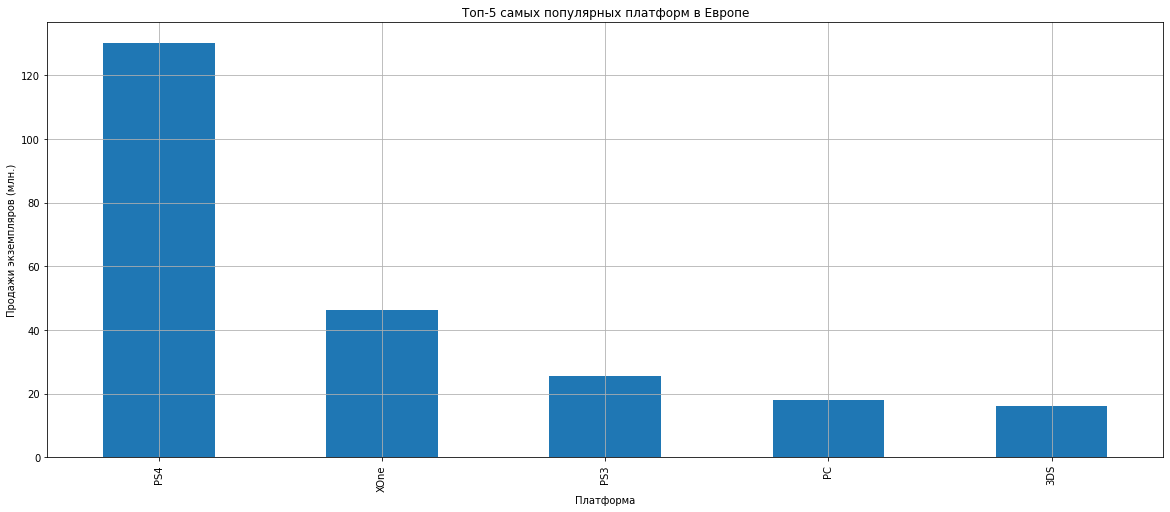

In [54]:
# группируем продажи в Европе по платформам
platform_eu = df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_eu.plot(x='platform', y='eu_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных платформ в Европе')
# меняем название горизонтальной оси ('X')
plt.xlabel('Платформа')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [55]:
# вычисляем долю (процентное соотношение)
percent_eu = platform_eu / platform_total * 100
print('Доля продаж в Европе:')
print(percent_eu.sort_values(ascending=False).head(5))

Доля продаж в Европе:
platform
PC      66.432532
PS4     45.129273
PS3     37.459666
XOne    32.950983
3DS     18.597139
dtype: float64


В Европе также платформа PS4 лидер по продажам, а доля относительно общих продаж у платформы занимает 2-е место. Видимо также на это могут влиять предпочтения пользователей в отдельно взятом регионе и в остальных регионах вместе взятых.

#### Топ-5 самых популярных платформ в Японии

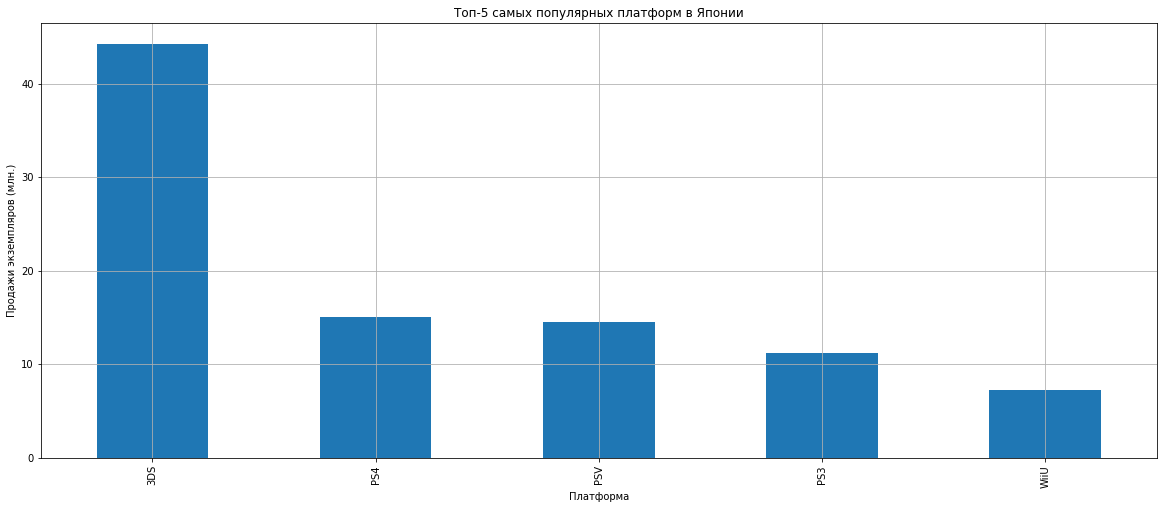

In [56]:
# группируем продажи в Японии по платформам
platform_jp = df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_jp.plot(x='platform', y='jp_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных платформ в Японии')
# меняем название горизонтальной оси ('X')
plt.xlabel('Платформа')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [57]:
# вычисляем долю (процентное соотношение)
percent_jp = platform_jp / platform_total * 100
print('Доля продаж в Японии:')
print(percent_jp.sort_values(ascending=False).head(5))

Доля продаж в Японии:
platform
PSV     64.910714
3DS     51.038302
WiiU    17.007911
PS3     16.456439
PS4      5.212563
dtype: float64


#### Топ-5 самых популярных платформ в других регионах

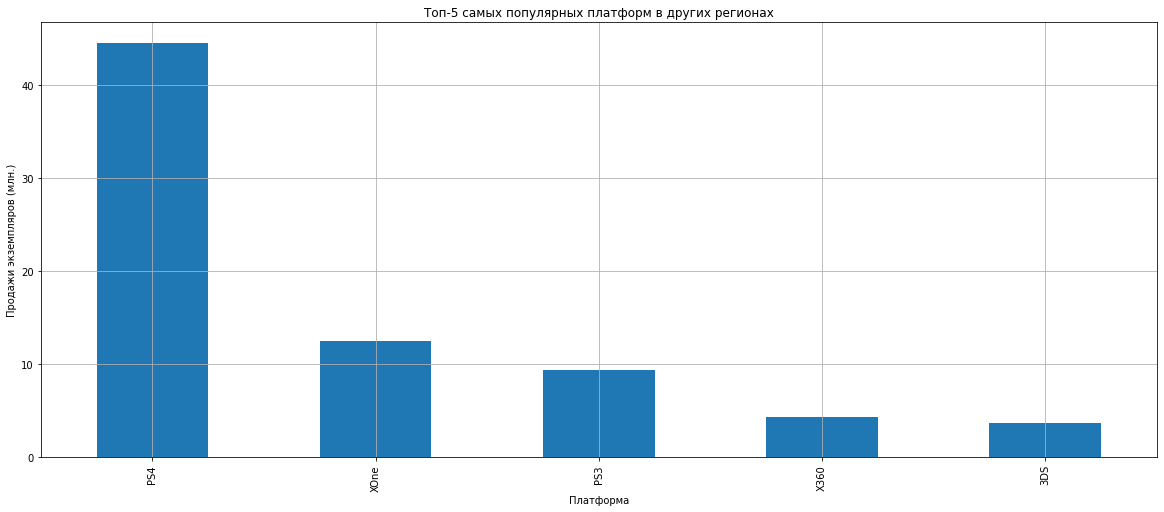

In [58]:
# группируем продажи по платформам
platform_other = df_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
platform_other.plot(x='platform', y='other_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных платформ в других регионах')
# меняем название горизонтальной оси ('X')
plt.xlabel('Платформа')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [59]:
# вычисляем долю (процентное соотношение)
percent_other = platform_other / platform_total * 100
print('Доля продаж в др.регионах:')
print(percent_other.sort_values(ascending=False).head(5))

Доля продаж в др.регионах:
platform
PS4     15.436405
PS3     13.743033
X360     9.021153
XOne     8.919920
3DS      4.245501
dtype: float64


**Вывод:** Выявили топ-5 платформ для 4 регионов. Две платформы есть в топ-5 у всех регионов - это PS3, PS4. Но платформа может быть не на первом месте в одном регионе, и при этом ее доля в регионе относительно всех продаж может быть максимальной. Например, платформа PC в Европе. <br>
Или платформа PS4 лидер по продажам в Сев.Америке и Европе, но при этом доля относительно общих продаж у платформы занимает 3-е  и 2-е место соответственно. На это могут влиять предпочтения пользователей в отдельно взятом регионе и в остальных регионах вместе взятых. Может быть в анализируемый период времени в др. регионах проходили различные активности для стимулирования продаж.

### Определение для пользователя каждого региона (NA, EU, JP) самых популярных жанров (топ-5).

#### Топ-5 самых популярных жанров в Сев.Америке

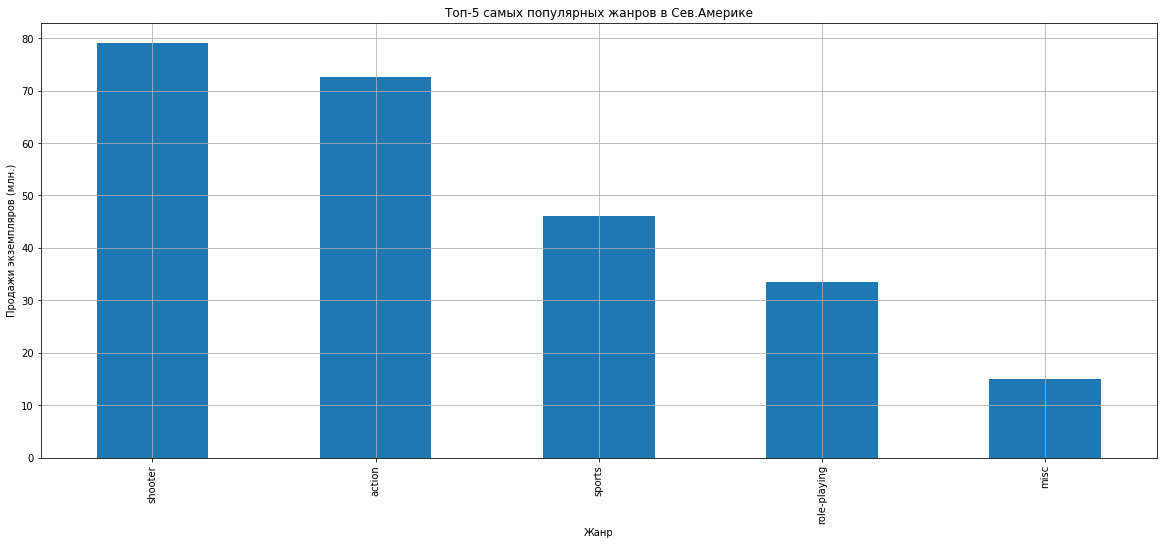

In [60]:
# группируем продажи в Сев.Америке по жанрам
genre_na = df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_na.plot(x='genre', y='na_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных жанров в Сев.Америке')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [61]:
# найдем долю продаж в Сев.Америке

# переменной genre_total присвоим сумму общих продаж по всем платформам
genre_total = df_new.groupby('genre')['total_sales'].sum()

# вычисляем долю (процентное соотношение)
percent_genre_na = genre_na / genre_total * 100
print('Доля продаж в Сев.Америке:')
print(percent_genre_na.sort_values(ascending=False).head(5))

Доля продаж в Сев.Америке:
genre
shooter         46.226746
sports          42.135550
misc            40.079893
action          36.381421
role-playing    32.994874
dtype: float64


#### Топ-5 самых популярных жанров в Европе

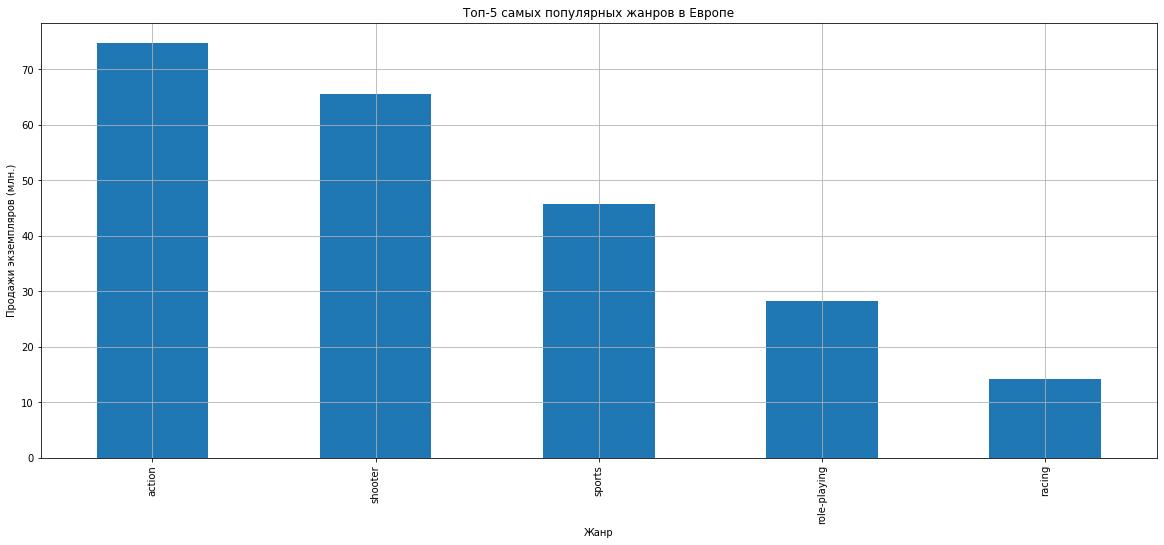

In [62]:
# группируем продажи в Европе по жанрам
genre_eu = df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_eu.plot(x='genre', y='eu_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных жанров в Европе')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [63]:
# вычисляем долю (процентное соотношение)
percent_genre_eu = genre_eu / genre_total * 100
print('Доля продаж в Европе:')
print(percent_genre_eu.sort_values(ascending=False).head(5))

Доля продаж в Европе:
genre
racing          51.344477
sports          41.770186
shooter         38.329238
action          37.459872
role-playing    27.770110
dtype: float64


#### Топ-5 самых популярных жанров в Японии

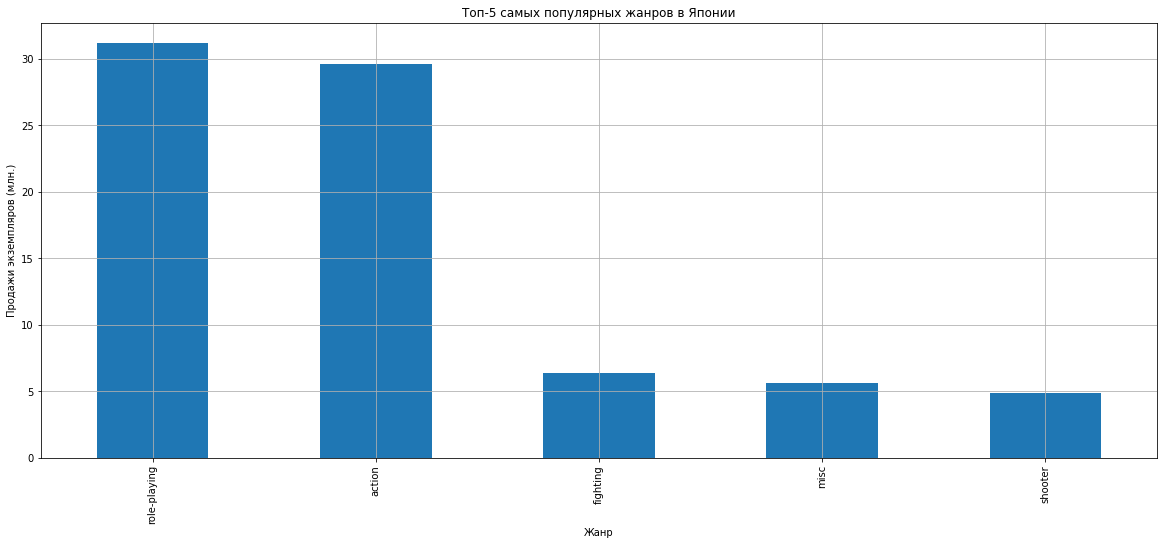

In [64]:
# группируем продажи в Японии по жанрам
genre_jp = df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_jp.plot(x='genre', y='jp_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных жанров в Японии')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [65]:
# вычисляем долю (процентное соотношение)
percent_genre_jp = genre_jp / genre_total * 100
print('Доля продаж в Японии:')
print(percent_genre_jp.sort_values(ascending=False).head(5))

Доля продаж в Японии:
genre
role-playing    30.717666
fighting        22.572644
misc            14.940080
action          14.837480
shooter          2.848953
dtype: float64


#### Топ-5 самых популярных жанров в других регионах

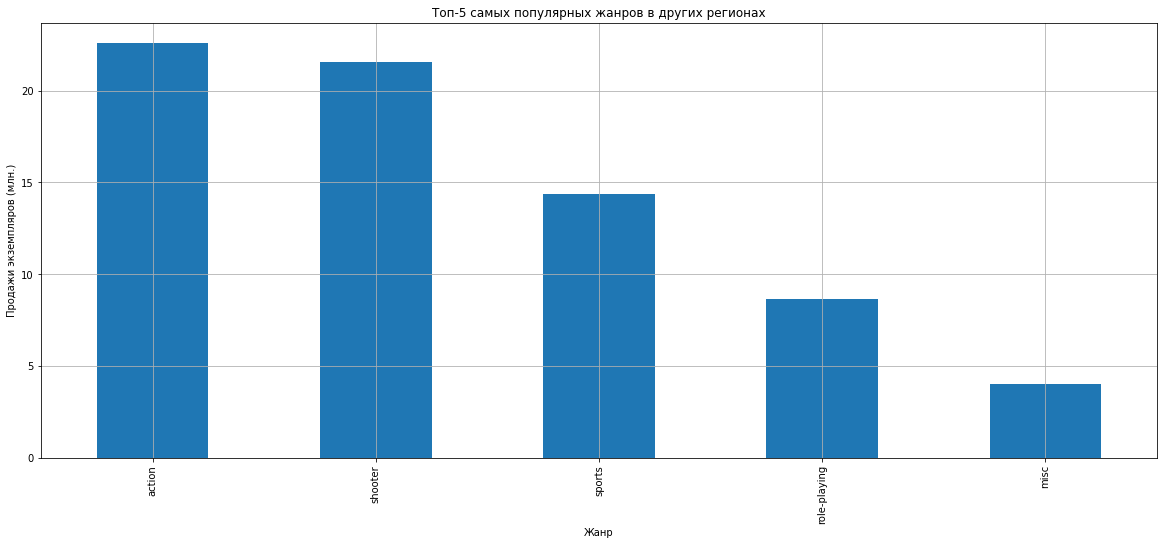

In [66]:
# группируем продажи в других регионах по жанрам
genre_other = df_new.groupby('genre')['other_sales'].sum().sort_values(ascending=False).head(5)
# построим гистограмму
genre_other.plot(x='genre', y='other_sales', kind='bar', \
                 figsize=(20,8), grid=True, title = 'Топ-5 самых популярных жанров в других регионах')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [67]:
# вычисляем долю (процентное соотношение)
percent_genre_other = genre_other / genre_total * 100
print('Доля продаж в других регионах:')
print(percent_genre_other.sort_values(ascending=False).head(5))

Доля продаж в других регионах:
genre
sports          13.116551
shooter         12.595063
action          11.321228
misc            10.732357
role-playing     8.517350
dtype: float64


**Вывод:** Выявили топ-5 жанров для 4 регионов. Практически все полученные жанры входят в топ-5 всех регионов, но отличаются объемами продаж. В одном регионе жанр может быть самым продаваемым, а в другом - на третьем месте. И также как с платформой, жанр может быть лидером продаж в одном регионе, и при этом его доля в регионе относительно всех продаж может быть минимальной.

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Рейтинг от ESRB в Сев.Америке

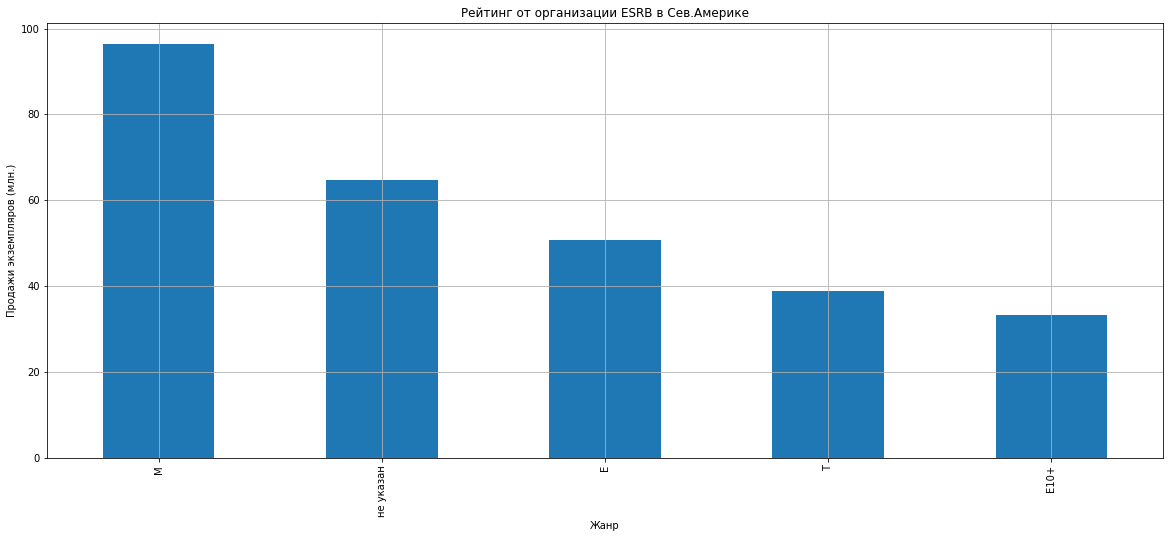

In [68]:
# группируем данные по рейтингу
rating_na = df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_na.plot(x='rating', y='na_sales', kind ='bar', \
               figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Сев.Америке')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Сев.Америке больше всего продаж у игр с рейтингом M («Mature») — «От 17 лет».

#### Рейтинг от ESRB в Европе

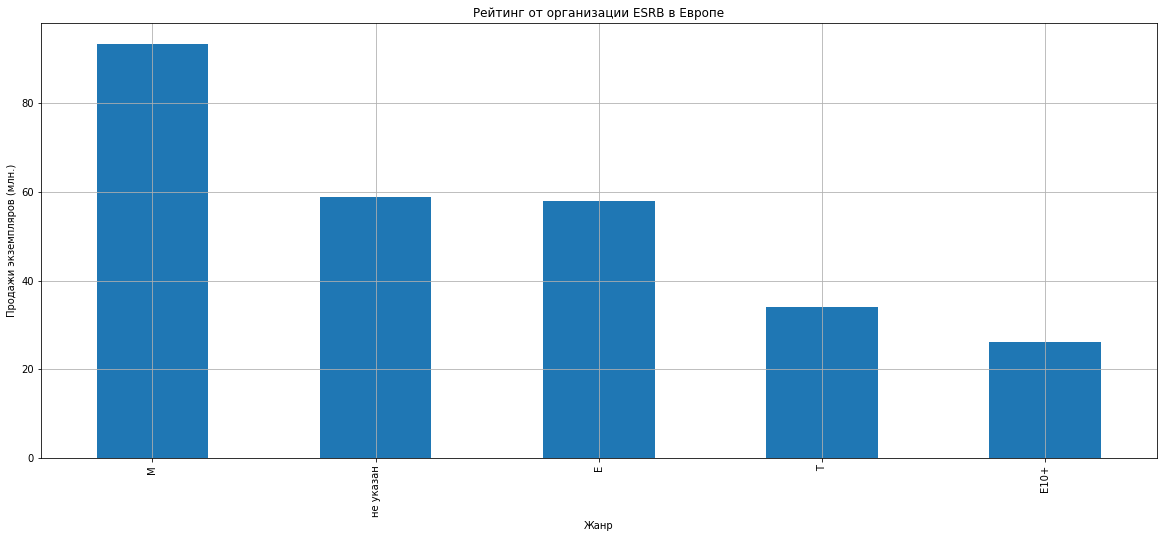

In [69]:
# группируем данные по рейтингу
rating_eu = df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_eu.plot(x='rating', y='eu_sales', kind ='bar', \
               figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Европе')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе тоже самые большие продажи у игр с рейтингом M, а потом игры с неопределенным рейтингом.

#### Рейтинг от ESRB в Японии

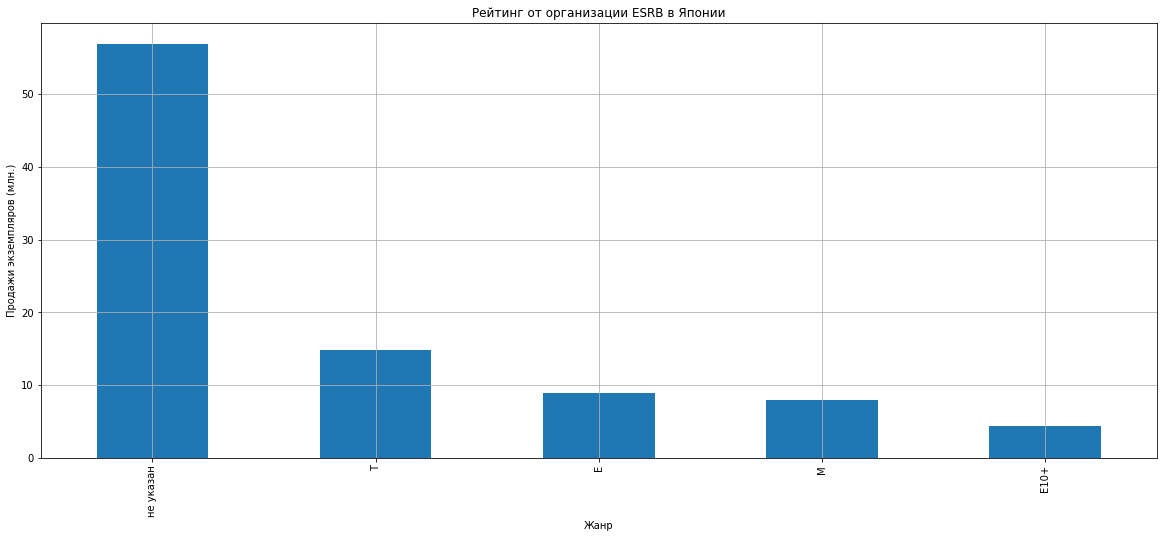

In [70]:
# группируем данные по рейтингу
rating_jp = df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_jp.plot(x='rating', y='jp_sales', kind ='bar', \
               figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в Японии')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии на первом месте игры с неопределенным рейтингом, далее с рейтингом T (13+).

#### Рейтинг от ESRB в других регионах

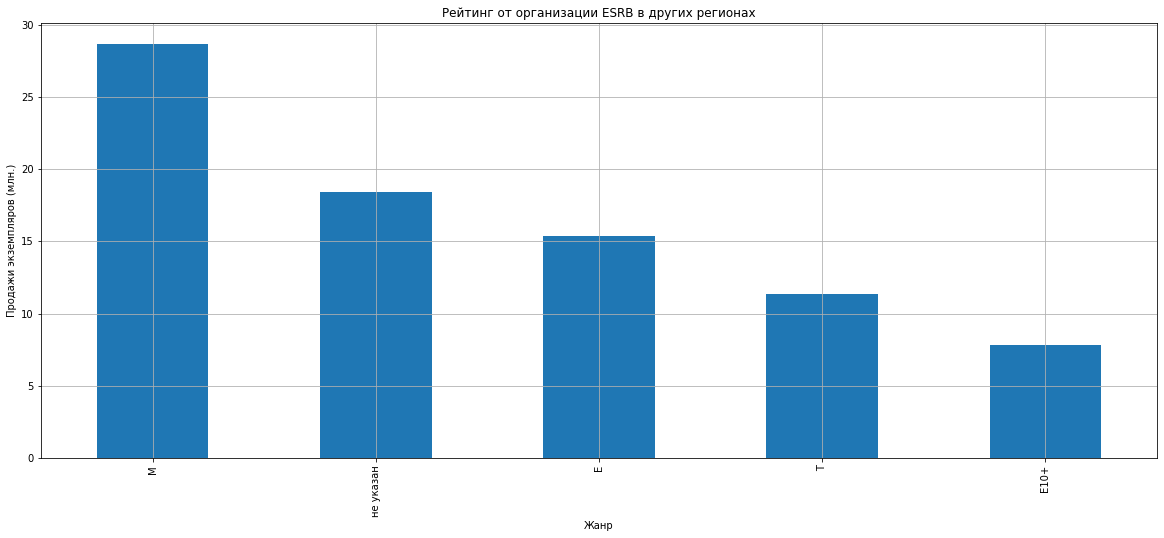

In [71]:
# группируем данные по рейтингу
rating_other = df_new.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
# построим гистограмму
rating_other.plot(x='rating', y='other_sales', kind ='bar', \
               figsize=(20,8), grid=True, title = 'Рейтинг от организации ESRB в других регионах')
# меняем название горизонтальной оси ('X')
plt.xlabel('Жанр')
# меняем название вертикальной оси ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В других регионах - больше продаж игр с ретингм M.

**Вывод:** Для всех регионов две платформы вошли в топ-5: PS3, PS4. PS4 самая продаваемая. По жанрам предпочтения пользователей у всех регионов практически совпали, позиции в топ-5 жанров одни и теже (кроме Японии: там есть жанр fighting, нет sports). Относительно рейтинга от ESRB - везде в лидерах игры для пользователей категории M.

## Проверка гипотез.

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы: <br>
H0 - "средние польз-кие рейтинги платформы Xbox One равны средним польз-ким рейтингам платформы PC" <br>
H1 - "средние польз-кие рейтинги платформы Xbox One не равны средним польз-ким рейтингам платформы PC"

In [75]:
df_xbox['user_score']

99       NaN
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    NaN
16660    6.7
16672    NaN
Name: user_score, Length: 228, dtype: float64

In [72]:
# используем датасет с актуальным периодом df_new
# создадим две выборки по платформам XOne и PC

df_xbox = df_new[df_new['platform'] == 'XOne']
df_pc = df_new[df_new['platform'] == 'PC']

# обозначим две выборки конкретных столбцов с пользовательскими рейтингами
xbox_1 = df_xbox['user_score']
pc_1 = df_pc['user_score']

alpha = 0.05 # обозначим критический уровень статистической значимости
# если p-value окажется меньше alpha - отвергнем гипотезу H0

results = st.ttest_ind(xbox_1, pc_1, equal_var=False, nan_policy='omit')
# задали доп.парамерт nan_policy='omit' - игнорировать в выборках пропуски NaN
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: с вероятностью 11% средние пользовательские рейтинги для этих платформ совпадут. Это достаточно большая вероятность для нулевой гипотезы, чтобы ее оставить.

### Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую и альтернативную гипотезы: <br>
H0 - "средние польз-кие рейтинги жанра Action равны средним польз-ким рейтингам жанра Sports" <br>
H1 - "средние польз-кие рейтинги жанра Action не равны средним польз-ким рейтингам жанра Sports"

In [73]:
# используем датасет с актуальным периодом df_new
# создадим две выборки по жанрам action и sports

df_action = df_new[df_new['genre'] == 'action']
df_sports = df_new[df_new['genre'] == 'sports']

# обозначим две выборки конкретных столбцов с пользовательскими рейтингами
action_1 = df_action['user_score']
sports_1 = df_sports['user_score']

alpha = 0.05 # обозначим критический уровень статистической значимости
# если p-value окажется меньше alpha - отвергнем гипотезу H0

results = st.ttest_ind(action_1, sports_1, equal_var=False, nan_policy='omit')
# задали доп.парамерт nan_policy='omit' - игнорировать в выборках пропуски NaN
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Значение p-value очень маленькое, меньше alpha = 0.05. Нельзя утверждать, что пользователям в среднем одинаково нравятся оба жанра.

Для проверки гипотез сначала сформулировали нулевую гипотезу H0. H0 всегда формулируется так, чтобы использовать знак равенства. Поэтому предположили, что рейтинги платформ/жанров равны. Соответственно альтернативная гипотеза H1 - что рейтинги платформ/жанров не равны. <br>
Далее для проверки гипотез использовали метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).

## Общий вывод.

Была определена задача: выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. <br>
<br>
Такими закономерностями/факторами могут быть зарекомендовавшие себя популярные платформы, жанры игр, рейтинг от ESRB. Также могут стимулировать продажи, например, новинки игр от топовых платформ, какие-то обновления и пр.<br>
<br>
В результате исслед. анализа определили, что характерный срок появления платформы 1 год, а спад происходит гораздо медленее и может занять от 1 года до 4-6 лет. Средний период жизни платформы - 6,5 лет. <br>
<br>
Был анализирован период 2014-2016 гг. В этот период определили потенциально прибыльные платформы: PS4 и XOne (на этот момент обладали самыми большими продажами и были в тренде).<br>
На следующий год ставку можно делать на платформу PS4, т.к. она популярна в большинстве регионов.<br>
<br>
Также интересны платформы X360, 3DS, PS3 - продажи в итоге пошли на спад, который занял продолжительное время, но были достаточно длительные периоды роста.<br>
<br>
Для пользователей всех регионов интересны платформы PS3 и PS4. <br>
В разных странах пользователи предпочитают разные жанры игр, но большинство склоняются к жанру shooter. Также в ТОП жанров попали: action, role-playing (в Японии).<br>
<br>
Топ-рейтинг от организации ESRB: категория M («Для взрослых»: 17+). В Японии второе место у категории T (13+).<br>
<br>
В результате анализа гипотез определили:<br>
- нельзя исключать вероятность, что средние пользовательские рейтинги для платформ Xbox One и PC совпадут.<br>
- нельзя утверждать, что пользователям в среднем одинаково нравятся оба жанра Action и Sports. 